<div><div style="float:left; clear:both;"><img src="img/colab.png" align="left" width="200" height="200" /><br></div><div style="float:left; clear:both;"><a href="https://colab.research.google.com/drive/1tnOvFNgXiLtktiSsltTr0s308LZSsEPJ">Abre este Jupyter en Google Colab</a></div></div>

# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 1. Generación del conjunto de datos

In [16]:
import numpy as np

# Número de equipo afectados.
X = 2 * np.random.rand(100, 1)

# Coste de incidentes.
y = 4 + 3 * X + np.random.randn(100, 1)

print('La longitud del conjunto de datos es: ',len(X))

La longitud del conjunto de datos es:  100


### 2. Visualización del conjunto de datos

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

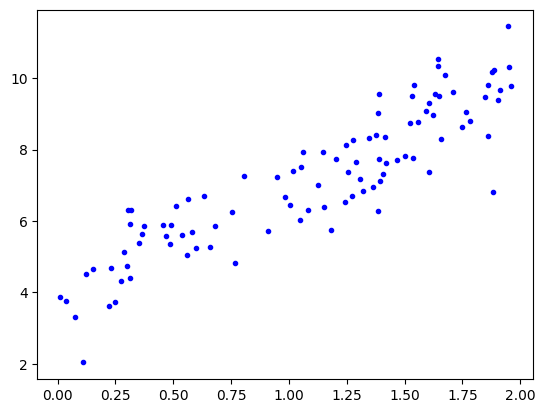

In [18]:
plt.plot(X, y, 'b.')
plt.show()

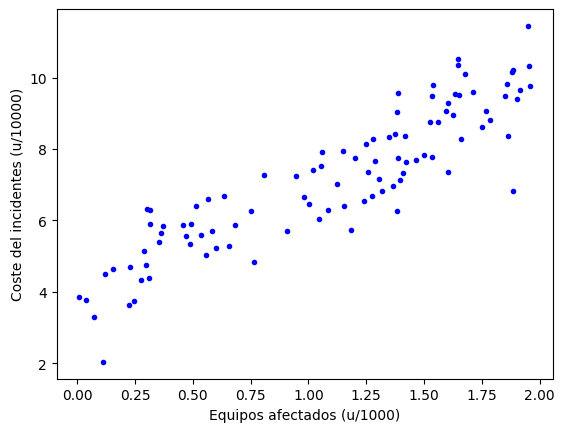

In [25]:
plt.plot(X, y, 'b.')
plt.xlabel('Equipos afectados (u/1000)')
plt.ylabel('Coste del incidentes (u/10000)')
plt.show()

### 3. Modificación del conjunto de datos

In [26]:
import pandas as pd

In [27]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,1.913331,9.660828
1,1.289699,7.662638
2,0.246883,3.737498
3,1.657515,8.289595
4,1.277517,8.276179
5,1.646326,10.343540
6,0.681746,5.871119
7,1.536006,7.768992
8,0.512219,6.411308
9,1.415265,8.355040


In [28]:
#Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')

#Escalado del coste de incidente
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,1913,96608
1,1289,76626
2,246,37374
3,1657,82895
4,1277,82761
5,1646,103435
6,681,58711
7,1536,77689
8,512,64113
9,1415,83550


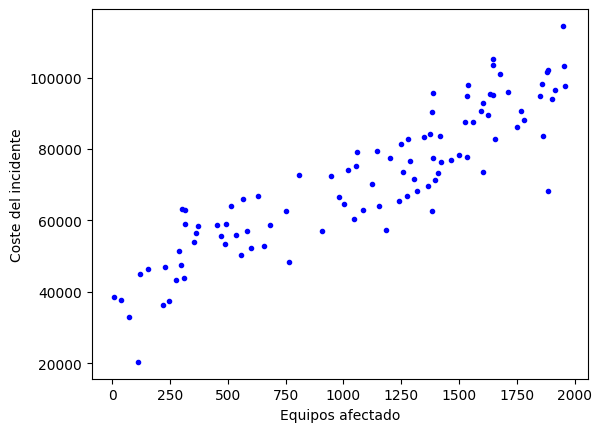

In [29]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], 'b.')
plt.xlabel('Equipos afectado')
plt.ylabel('Coste del incidente')
plt.show()

### 4. Construcción del modelo

In [31]:
from sklearn.linear_model import LinearRegression

In [40]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
# Entrenar el algoritmo
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values)

LinearRegression()

In [41]:
# Parámetro theta 0
lin_reg.intercept_

38925.70065781468

In [43]:
# Parámetro theta 1
lin_reg.coef_

array([30.09405617])

In [72]:
# Predicción para el valor mínimo y máximo del conjunto de los datos de entrenamiento
X_min_max = np.array([[df['n_equipos_afectados'].min()], [df['n_equipos_afectados'].max()]])
print(X_min_max, [[df['n_equipos_afectados'].min()], [df['n_equipos_afectados'].max()]])
y_train_pred = lin_reg.predict(X_min_max)
print(y_train_pred)

[[  10]
 [1959]] [[10], [1959]]
[39226.64121956 97879.956703  ]


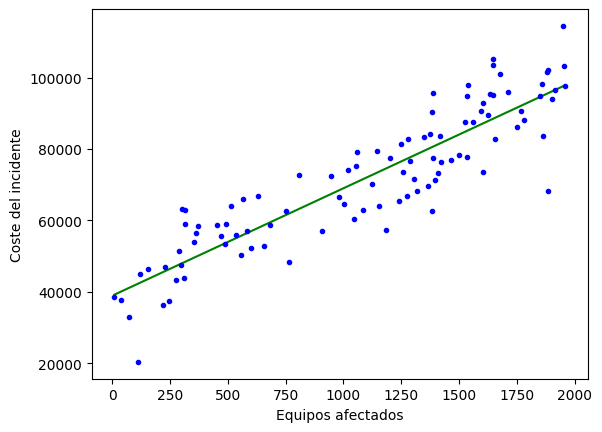

In [57]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(df['n_equipos_afectados'], df['coste'], 'b.')
plt.xlabel('Equipos afectados')
plt.ylabel('Coste del incidente')
plt.show()

### 5. Predicción de nuevos ejemplos

In [70]:
x_new = np.array([[1200], [10]]) # 1200 equipos afectados
print(x_new)

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new)
print('El coste del incidente sería: $', int(coste[0]))
print('El coste del incidente sería: $', int(coste[1]))

[[1200]
 [  10]]
El coste del incidente sería: $ 75038
El coste del incidente sería: $ 39226


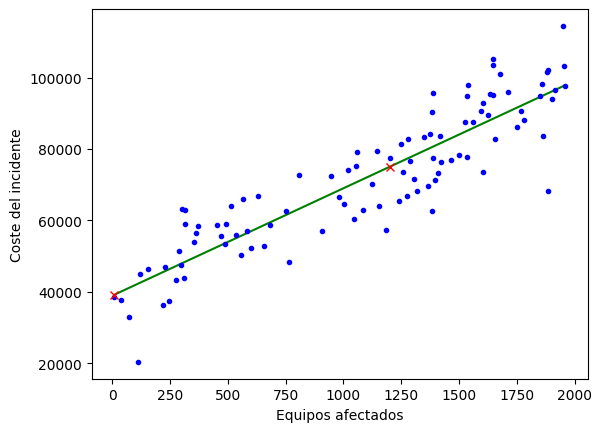

In [71]:
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(df['n_equipos_afectados'], df['coste'], 'b.')
plt.plot(x_new, coste, 'rx')
plt.xlabel('Equipos afectados')
plt.ylabel('Coste del incidente')
plt.show()